# IndexLongRun Financial Tools - Overview

This notebook provides a high-level overview of the repository, example usages, and links to more detailed notebooks.

In [12]:
import sys
import os

# Get the current working directory (notebook directory) and go up one level
project_root = os.path.dirname(os.getcwd())
sys.path.insert(0, project_root)

# Now you can import your modules
from retirement_simulator.engine import run_simulation
from shared_logic import real_return
print('modules loaded')

modules loaded


In [13]:
# Quick import/version check and smoke test
import sys, importlib
import numpy as np
import pandas as pd
from retirement_simulator.engine import run_simulation
from shared_logic.math_utils import real_return

print('python:', sys.version.split()[0])
print('numpy:', np.__version__)
print('pandas:', pd.__version__)
print('retirement_simulator available')

# run a tiny simulation as a smoke test
res = run_simulation(100000, 5000, 2000, years=5, trials=100, random_seed=1)
print('smoke test success rate:', res.success_rate)

python: 3.12.1
numpy: 1.26.4
pandas: 2.3.1
retirement_simulator available
smoke test success rate: 1.0


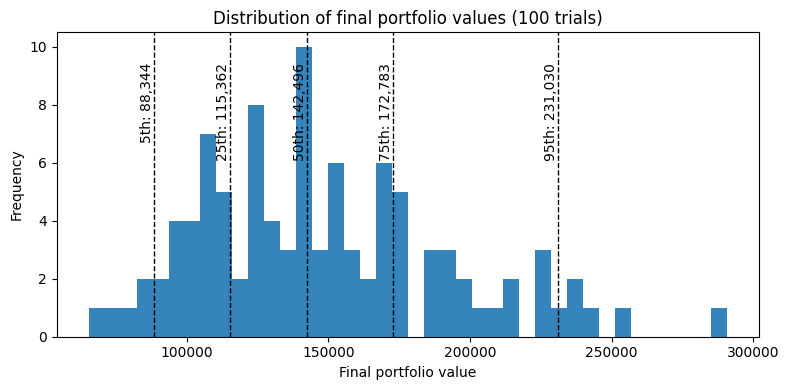

In [14]:
# Plot distribution of final portfolio values and key percentiles
import matplotlib.pyplot as plt
import numpy as np

# res should be available from the previous cell; rerun if needed
values = res.final_values
fig, ax = plt.subplots(figsize=(8,4))
ax.hist(values, bins=40, color='#1f77b4', alpha=0.9)
ax.set_title('Distribution of final portfolio values ({} trials)'.format(res.trials))
ax.set_xlabel('Final portfolio value')
ax.set_ylabel('Frequency')

# percentiles
pcts = [5,25,50,75,95]
pct_vals = np.percentile(values, pcts)
for p, v in zip(pcts, pct_vals):
    ax.axvline(v, color='k', linestyle='--', linewidth=1)
    ax.text(v, ax.get_ylim()[1]*0.9, f'{p}th: {v:,.0f}', rotation=90, va='top', ha='right')

plt.tight_layout()
plt.show()